### Exploración y predicción del dataset Infartos

Hacemos las importaciones de librerias

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

Cargamos el dataset de Infartos y imprimimos los elementos

In [40]:
# Cargar los datos
df = pd.read_csv('infartos.csv')
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Contamos con 1319 registros en total del dataset utilizado.

Como podemos observar Result es "positive" o "negative", por lo que vamos a asignarle un valor como 0 a negative y 1 a positive

In [41]:
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])

# Exploración de Datos


### Gráfico de Clases

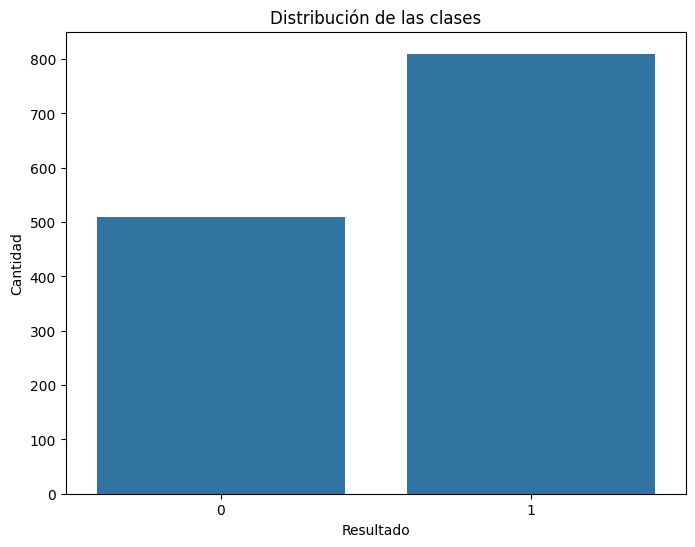

In [42]:
# Visualización de la distribución de las clases
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df)
plt.title('Distribución de las clases')
plt.xlabel('Resultado')
plt.ylabel('Cantidad')
plt.show()

### Gráfico de clases por genero

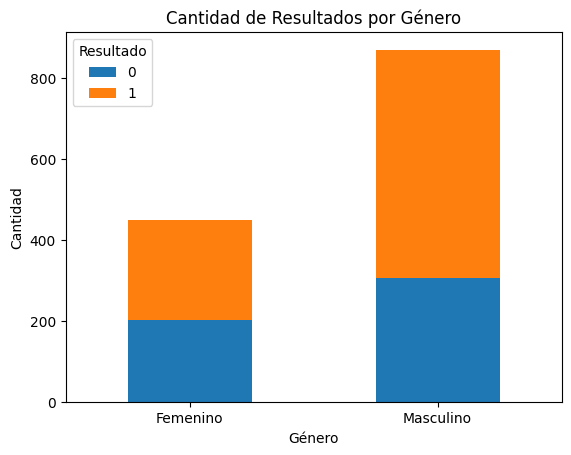

In [43]:
# Contar la cantidad de resultados por género
result_counts = df.groupby('Gender')['Result'].value_counts().unstack()

# Graficar
result_counts.plot(kind='bar', stacked=True)
plt.title('Cantidad de Resultados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Femenino', 'Masculino'], rotation=0)
plt.legend(title='Resultado')
plt.show()

### Graficó que muestra la relación directa entre la edad y la cantidad de pacientes que salieron positivos

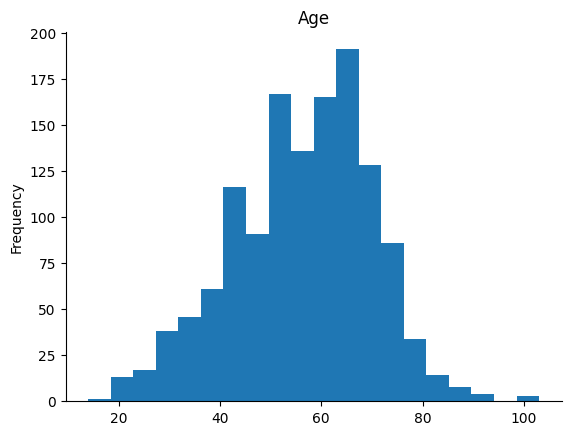

In [44]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Gráfico para mostrar la matriz de correlación de los diferentes features


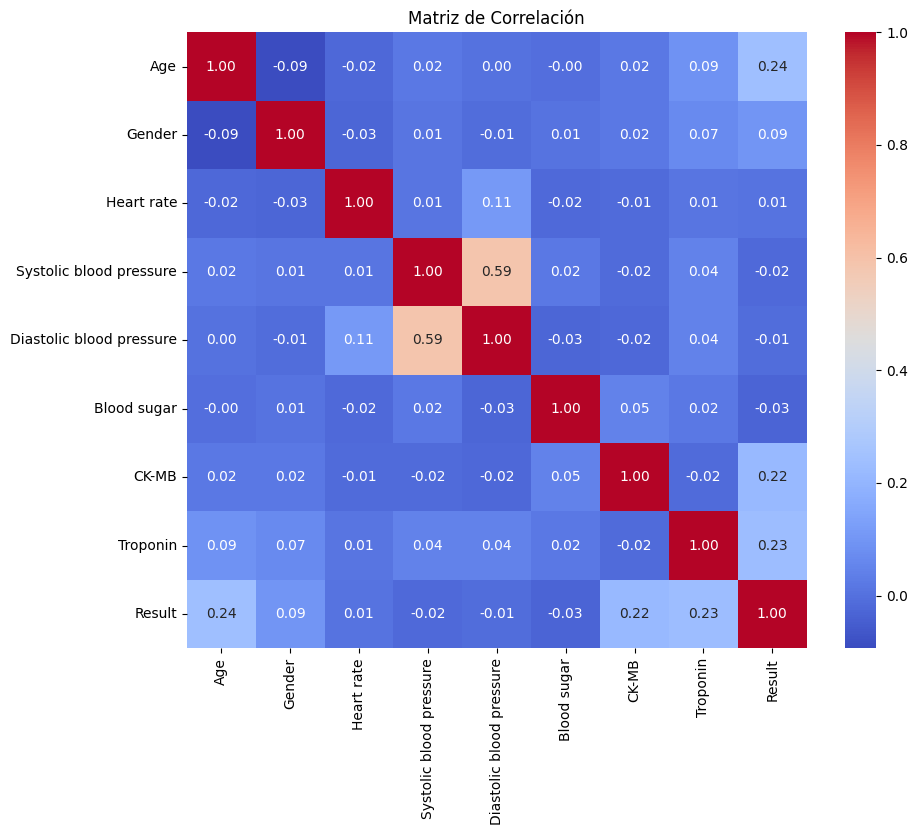

In [45]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Graficó de distribución de resultados agrupando las edades

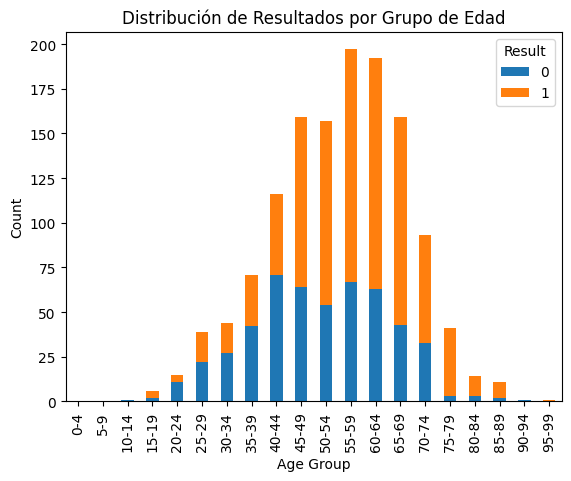

In [46]:
df_copy = df.copy()

# Agrupar edades en rangos de 10 años
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99']
df_copy['Age_Group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels)

# Graficar
df_grouped = df_copy.groupby(['Age_Group', 'Result']).size().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribución de Resultados por Grupo de Edad')
plt.show()

### Boxplot de cada feature del dataset

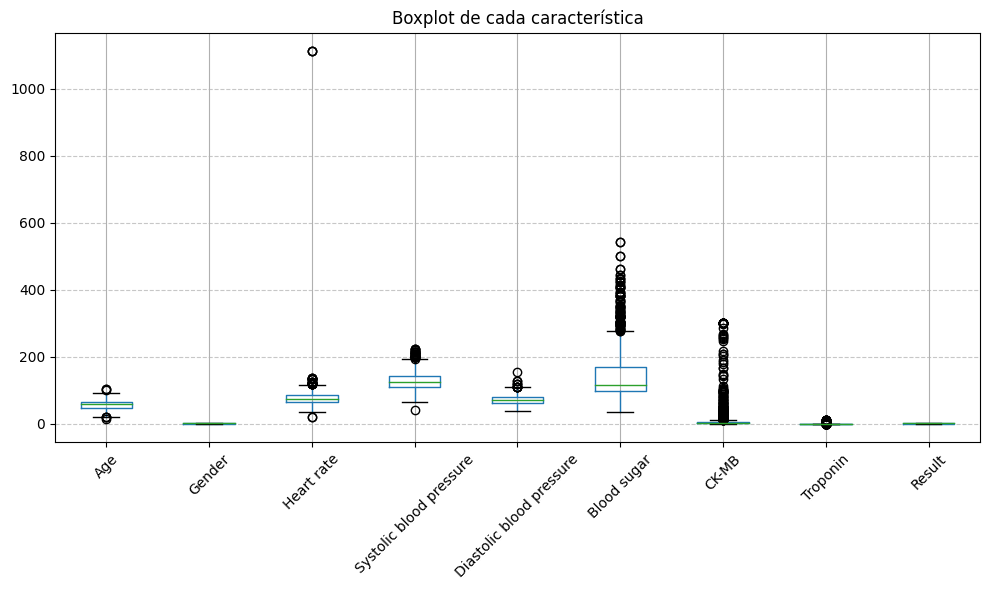

In [47]:
# Crear el boxplot para cada característica
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot de cada característica')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Implementación de los modelos

## Obtenemos el train y el test data

In [48]:
# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('Result', axis=1)
y = df['Result']

In [49]:
# Separar las muestras de cada clase
positive_samples = df[df['Result'] == 1]
negative_samples = df[df['Result'] == 0]

# Seleccionar una cantidad igual de muestras de cada clase
min_samples = min(len(positive_samples), len(negative_samples))
balanced_samples = pd.concat([positive_samples.head(min_samples), negative_samples.head(min_samples)])

# Dividir los datos balanceados en características (X) y etiquetas (y)
X_balanced = balanced_samples.drop('Result', axis=1)
y_balanced = balanced_samples['Result']

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Normalizar características utilizando la media
scaler = StandardScaler(with_mean=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regresión Logistica

### Ejemplo A - El más óptimo

In [58]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de entrenamiento y prueba
y_test_pred = model.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.8431372549019608
Precision: 0.872093023255814
Recall: 0.78125


### Ejemplo B

In [59]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de entrenamiento y prueba
y_test_pred = model.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.8431372549019608
Precision: 0.872093023255814
Recall: 0.78125


### Ejemplo C

In [61]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=130, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de entrenamiento y prueba
y_test_pred = model.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.8431372549019608
Precision: 0.872093023255814
Recall: 0.78125


## Modelo de KNN

### Ejemplo A - El más óptimo

In [53]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.7598039215686274
Precision: 0.8405797101449275
Recall: 0.6041666666666666


### Ejemplo B

In [62]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.7303921568627451
Precision: 0.7808219178082192
Recall: 0.59375


### Ejemplo C

In [63]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)

Accuracy: 0.7205882352941176
Precision: 0.819672131147541
Recall: 0.5208333333333334


## Modelo de Redes Neuronales

### Ejemplo A - El más óptimo

In [70]:
# Hiperparámetros
hidden_layer_sizes = (10, 10)
batch_size = 64
learning_rate_init = 0.001
max_iter = 1000
random_state = 42

# Entrenar el modelo MLPClassifier
model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      batch_size=batch_size,
                      learning_rate_init=learning_rate_init,
                      max_iter=max_iter,
                      random_state=random_state)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9264705882352942
Precision: 0.9354838709677419
Recall: 0.90625


### Ejemplo B

In [69]:
# Hiperparámetros
hidden_layer_sizes = (100, 100)
batch_size = 64
learning_rate_init = 0.001
max_iter = 1000
random_state = 42

# Entrenar el modelo MLPClassifier
model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      batch_size=batch_size,
                      learning_rate_init=learning_rate_init,
                      max_iter=max_iter,
                      random_state=random_state)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8872549019607843
Precision: 0.8924731182795699
Recall: 0.8645833333333334


### Ejemplo C

In [71]:
# Hiperparámetros
hidden_layer_sizes = (100, 100, 100)
batch_size = 64
learning_rate_init = 0.001
max_iter = 10
random_state = 42

# Entrenar el modelo MLPClassifier
model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                      batch_size=batch_size,
                      learning_rate_init=learning_rate_init,
                      max_iter=max_iter,
                      random_state=random_state)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8284313725490197
Precision: 0.8588235294117647
Recall: 0.7604166666666666


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
